![img](images/Tensor.jpg)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1D Tensor

In [2]:
x = torch.FloatTensor(5)
x

tensor([0., 0., 0., 0., 0.])

### 2D Tensor

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data.shape

(150, 4)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_tensor = torch.from_numpy(iris.data)
iris_tensor.size()

torch.Size([150, 4])

### 3D Tensor

In [6]:
from PIL import Image

panda = np.array(Image.open('images/panda.jpg'))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

torch.Size([718, 960, 3])

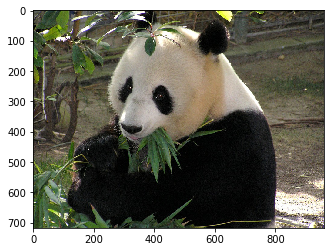

In [7]:
plt.imshow(panda)

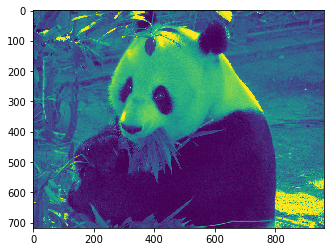

In [8]:
plt.imshow(panda_tensor[:,:,0].numpy());

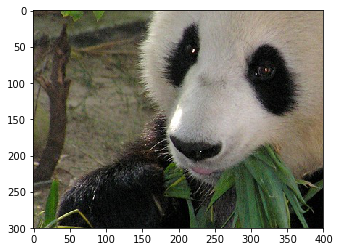

In [9]:
plt.imshow(panda_tensor[200:500,100:500,:].numpy());

In [10]:
diagonal = torch.eye(3,3)
diagonal

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### 4D Tensor

In [11]:
from glob import glob

# Read images from disk
cats = glob('images/cat*.jpg')

cat_imgs = np.array([np.array(Image.open(cat).resize((224,224))) for cat in cats])
print(cat_imgs.shape)

cat_imgs = cat_imgs.reshape(-1,224,224,3)
cat_tensors = torch.from_numpy(cat_imgs)
print(cat_tensors.size())

(5, 224, 224, 3)
torch.Size([5, 224, 224, 3])


### Auto Gradient

In [12]:
from torch.autograd import Variable

x = Variable(torch.ones(2,2), requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [13]:
y = x.mean()
y

tensor(1., grad_fn=<MeanBackward1>)

In [14]:
y.backward()
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [15]:
y.backward()
x.grad

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])

In [16]:
y.backward()
x.grad

tensor([[0.7500, 0.7500],
        [0.7500, 0.7500]])

In [17]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

In [18]:
print(x.grad_fn)
print(y.grad_fn)

None


In [19]:
x.data

tensor([[1., 1.],
        [1., 1.]])

### Create neural network

In [20]:
import torch.nn as nn

In [21]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    
    return X,y

def get_weights():
    w = Variable(torch.randn(1), requires_grad=True)
    b = Variable(torch.randn(1), requires_grad=True)
    return w,b

def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

In [22]:
model = nn.Linear(17,1)
model

Linear(in_features=17, out_features=1, bias=True)